In [5]:
import sys
import os
from os.path import join
import cv2
import torch
import numpy as np
import pandas as pd
import pickle as pkl
from PIL import Image
from tqdm.auto import tqdm, trange
import seaborn as sns
import matplotlib.pyplot as plt
sys.path.append("/n/home12/binxuwang/Github/DiffusionObjectRelation/utils")
from cv2_eval_utils import find_classify_object_masks

positive_threshold = 180 

### Collect all classifier and their associate statistics

In [6]:
saveroot = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/PixArt/results/objrel_rndembdposemb_DiT_B_pilot/latent_store"
figdir = '/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/PixArt/results/objrel_rndembdposemb_DiT_B_pilot/Figure_latent_feature_heatmap'
syndir = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/PixArt/results/objrel_rndembdposemb_DiT_B_pilot/synopsis"
os.makedirs(syndir, exist_ok=True)

In [7]:
syn_col = []
# annot_label = "triangle_vs_others"
for annot_label in ["triangle_vs_others", "red_triangle_vs_others", "topobj_vs_others", "topobj_vs_bottomobj"]:
    for t_index in reversed(range(14)):
        for training_pass in [("cond",), ("uncond",), ("cond", "uncond")]:
            training_pass_str = "-".join(training_pass)+"Pass"
            data = pkl.load(open(join(figdir, f"red_blue_8_relation_diff_t{t_index}_{annot_label}_classifier_{training_pass_str}.pkl"), 'rb'))
            clf, boundary_vector, eval_dict = data["classifier"], data["boundary_vector"], data["eval_dict"]
            stats_dict = eval_dict.copy()
            stats_dict["t_index"] = t_index
            stats_dict["training_pass"] = training_pass_str
            stats_dict["annot_label"] = annot_label
            stats_dict["boundary_vector"] = boundary_vector
            # stats_dict.pop('classifier')
            # stats_dict.pop('boundary_vector')
            syn_col.append(stats_dict)
            # print(f"t_index: {t_index}, training_pass: {training_pass_str}, eval_dict: {eval_dict}")
            # print(f"boundary_vector: {boundary_vector}")
syn_df = pd.DataFrame(syn_col)
# syn_df.to_csv(join(figdir, f"red_blue_8_relation_diff_stats_synopsis.csv"), index=False)
syn_df.to_pickle(join(syndir, f"red_blue_8_relation_feature_classifier_stats_synopsis.pkl"))

/n/home12/binxuwang/.conda/envs/torch2/lib/python3.10/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.5.1 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [8]:
print(syn_df.columns)
print(syn_df.shape)
syn_df.head()

Index(['classifier', 'train_score', 'test_score', 'confusion_matrix',
       'precision', 'recall', 'f1_score', 't_index', 'training_pass',
       'annot_label', 'boundary_vector'],
      dtype='object')
(168, 11)


classifier  train_score  test_score  \
0  LogisticRegression(fit_intercept=False, random...     0.998584    0.996538   
1  LogisticRegression(fit_intercept=False, random...     0.998446    0.995988   
2  LogisticRegression(fit_intercept=False, random...     0.998525    0.996578   
3  LogisticRegression(fit_intercept=False, random...     0.998289    0.996066   
4  LogisticRegression(fit_intercept=False, random...     0.998112    0.995516   

           confusion_matrix  precision    recall  f1_score  t_index  \
0  [[12327, 18], [26, 340]]   0.928962  0.949721  0.939227       13   
1  [[12323, 22], [29, 337]]   0.920765  0.938719  0.929655       13   
2  [[24639, 39], [48, 695]]   0.935397  0.946866  0.941097       13   
3  [[12321, 24], [26, 340]]   0.928962  0.934066  0.931507       12   
4  [[12323, 22], [35, 331]]   0.904372  0.937677  0.920723       12   

     training_pass         annot_label  \
0         condPass  triangle_vs_others   
1       uncondPass  triangle_vs_others   
2  cond-uncondPass  triangle_vs_others   
3         condPass  triangle_vs_others   
4       uncondPass  triangle_vs_others   

                                     boundary_vector  
0  [0.008668208553354716, 0.0203826495126457, 0.0...  
1  [-0.013596375724068181, 0.013547383406351653, ...  
2  [0.0009937166284665973, 0.007087743500217648, ...  
3  [0.01959661619372555, 0.0029094695033977398, 0...  
4  [0.0011943858922228772, 0.014581647608694617, ...

/tmp/ipykernel_2156354/654861112.py:2: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=syn_df, x="t_index", y="precision", style="training_pass", hue="annot_label", markers="o")


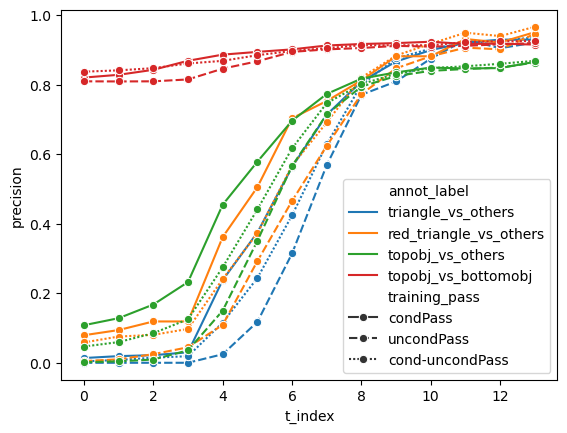

/tmp/ipykernel_2156354/654861112.py:4: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=syn_df, x="t_index", y="recall", style="training_pass", hue="annot_label", markers="o")


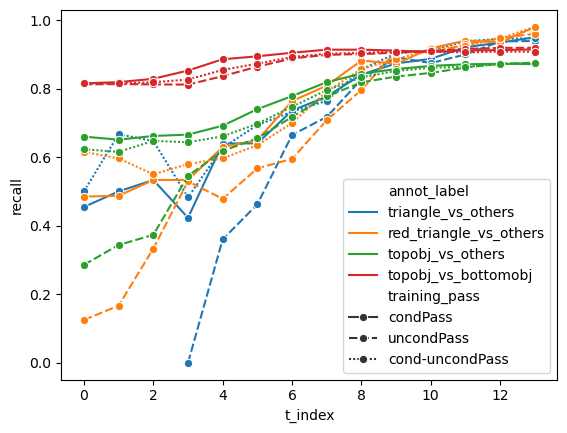

/tmp/ipykernel_2156354/654861112.py:6: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=syn_df, x="t_index", y="f1_score", style="training_pass", hue="annot_label", markers="o")


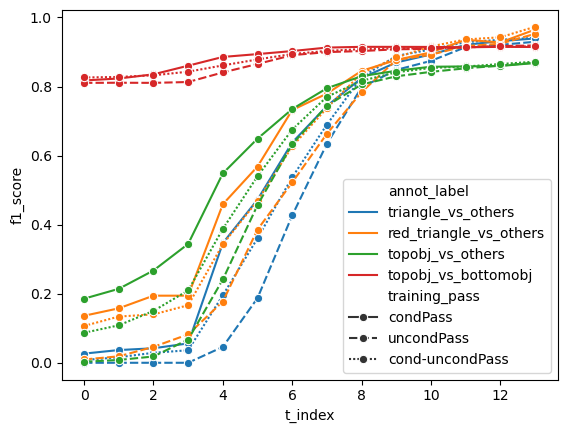

In [46]:

# sns.set_theme(style="whitegrid")
sns.lineplot(data=syn_df, x="t_index", y="precision", style="training_pass", hue="annot_label", markers="o")
plt.show()
sns.lineplot(data=syn_df, x="t_index", y="recall", style="training_pass", hue="annot_label", markers="o")
plt.show()
sns.lineplot(data=syn_df, x="t_index", y="f1_score", style="training_pass", hue="annot_label", markers="o")
plt.show()

/tmp/ipykernel_2156354/4203768328.py:5: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=syn_df[syn_df.annot_label == label],
/tmp/ipykernel_2156354/4203768328.py:5: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=syn_df[syn_df.annot_label == label],
/tmp/ipykernel_2156354/4203768328.py:5: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=syn_df[syn_df.annot_label == label],
/tmp/ipykernel_2156354/4203768328.py:5: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=syn_df[syn_df.annot_label == label],


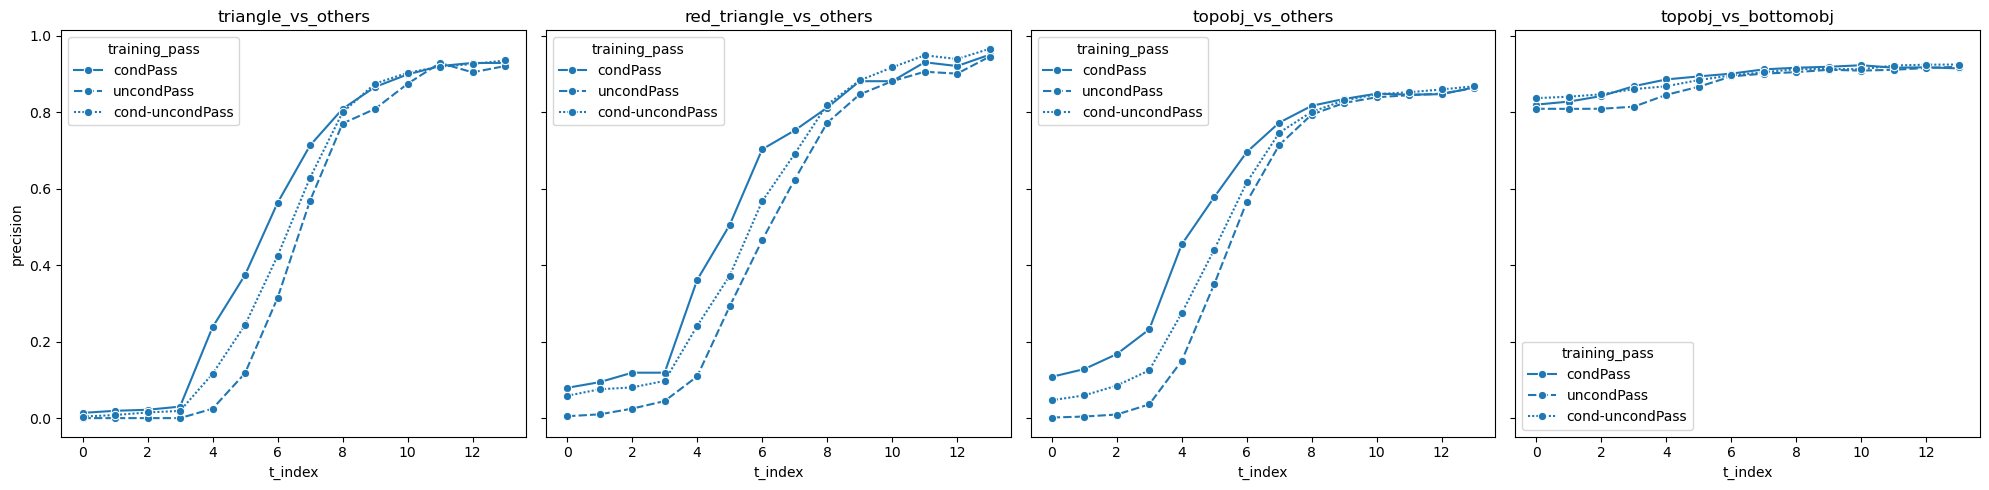

/tmp/ipykernel_2156354/4203768328.py:5: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=syn_df[syn_df.annot_label == label],
/tmp/ipykernel_2156354/4203768328.py:5: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=syn_df[syn_df.annot_label == label],
/tmp/ipykernel_2156354/4203768328.py:5: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=syn_df[syn_df.annot_label == label],
/tmp/ipykernel_2156354/4203768328.py:5: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=syn_df[syn_df.annot_label == label],


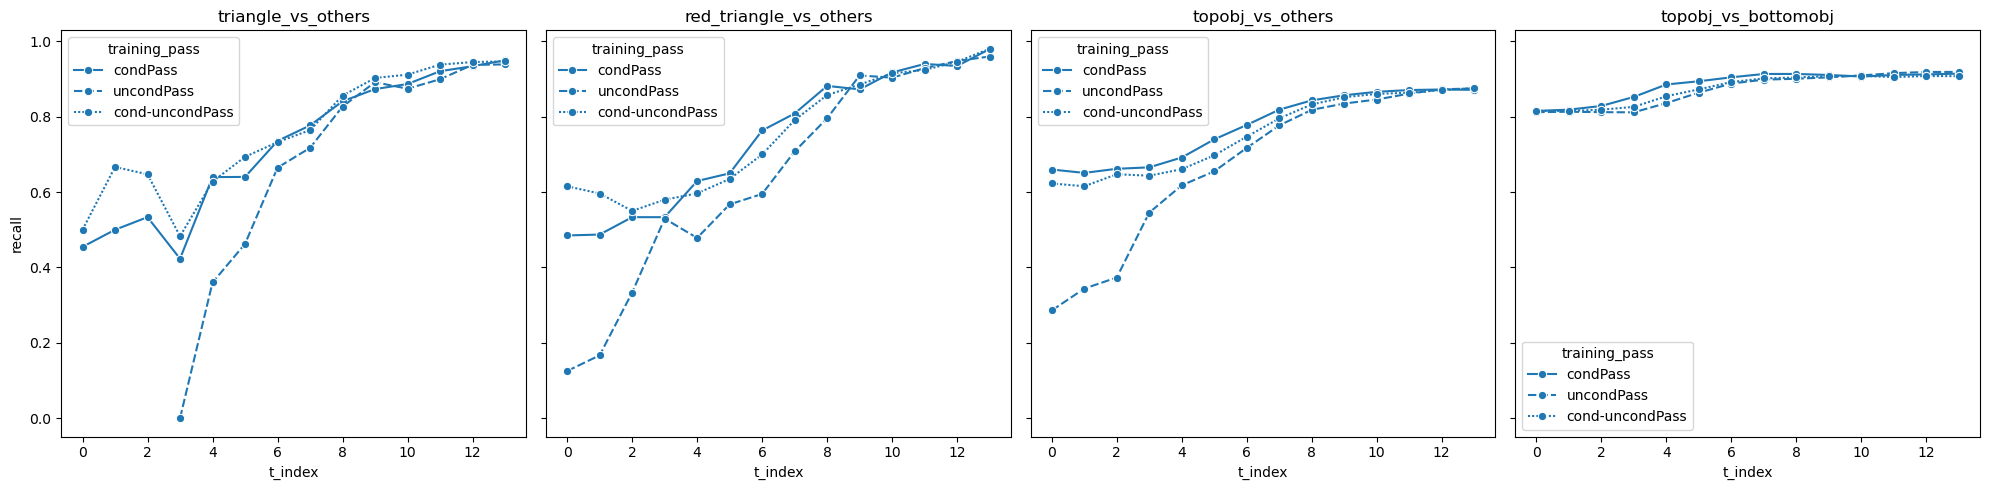

/tmp/ipykernel_2156354/4203768328.py:5: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=syn_df[syn_df.annot_label == label],
/tmp/ipykernel_2156354/4203768328.py:5: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=syn_df[syn_df.annot_label == label],
/tmp/ipykernel_2156354/4203768328.py:5: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=syn_df[syn_df.annot_label == label],
/tmp/ipykernel_2156354/4203768328.py:5: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=syn_df[syn_df.annot_label == label],


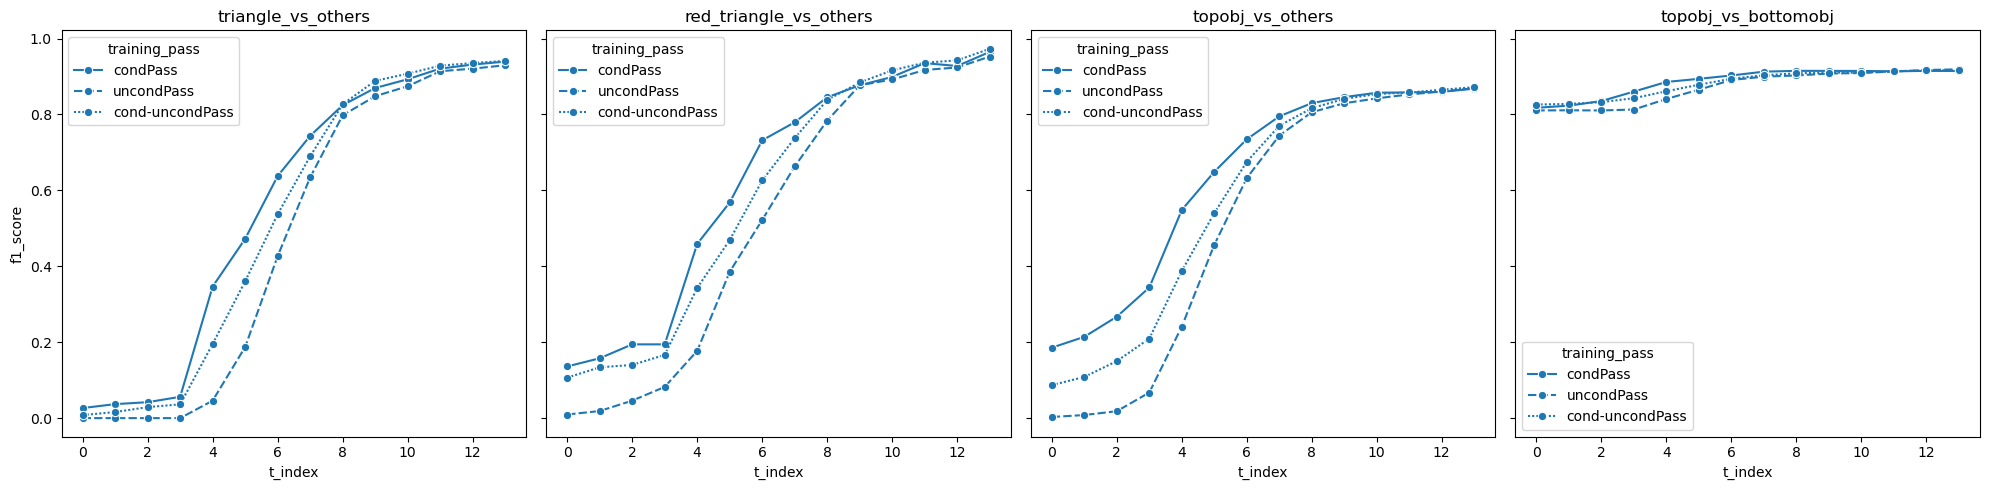

/tmp/ipykernel_2156354/4203768328.py:5: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=syn_df[syn_df.annot_label == label],
/tmp/ipykernel_2156354/4203768328.py:5: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=syn_df[syn_df.annot_label == label],
/tmp/ipykernel_2156354/4203768328.py:5: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=syn_df[syn_df.annot_label == label],
/tmp/ipykernel_2156354/4203768328.py:5: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=syn_df[syn_df.annot_label == label],


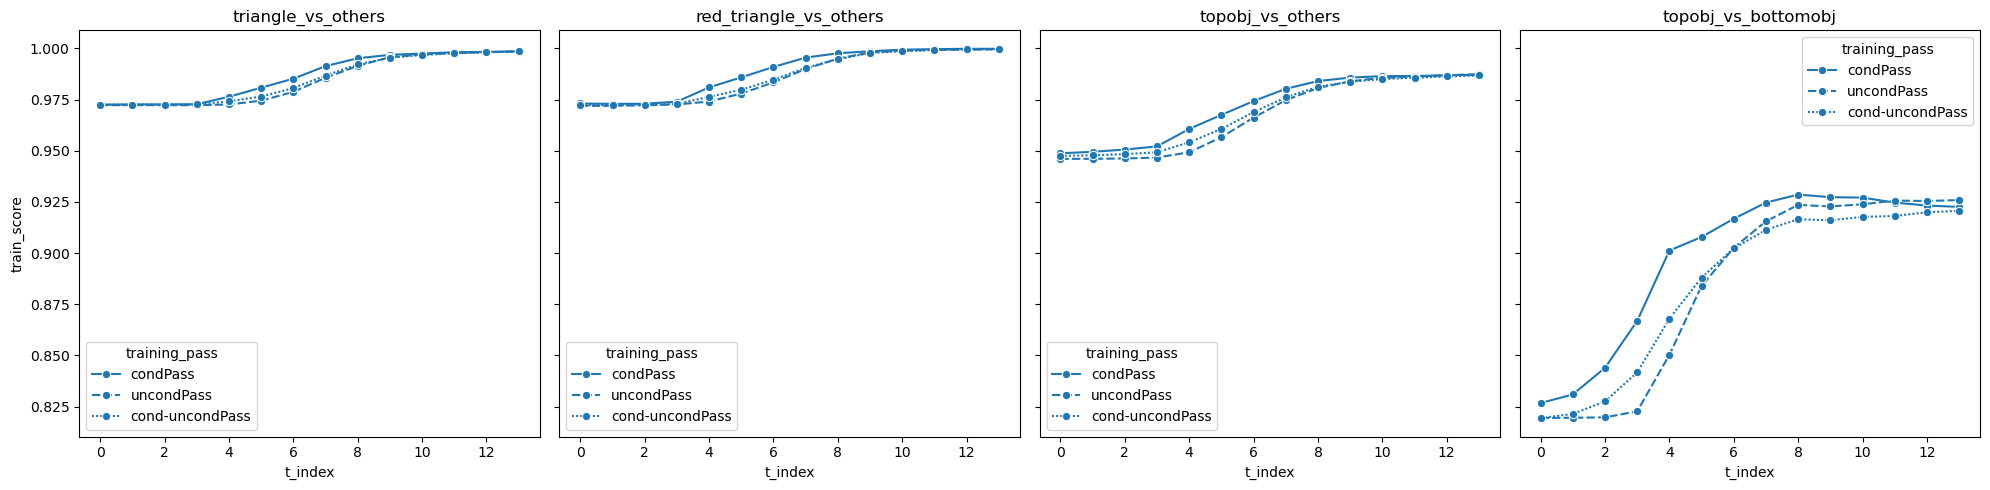

/tmp/ipykernel_2156354/4203768328.py:5: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=syn_df[syn_df.annot_label == label],
/tmp/ipykernel_2156354/4203768328.py:5: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=syn_df[syn_df.annot_label == label],
/tmp/ipykernel_2156354/4203768328.py:5: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=syn_df[syn_df.annot_label == label],
/tmp/ipykernel_2156354/4203768328.py:5: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=syn_df[syn_df.annot_label == label],


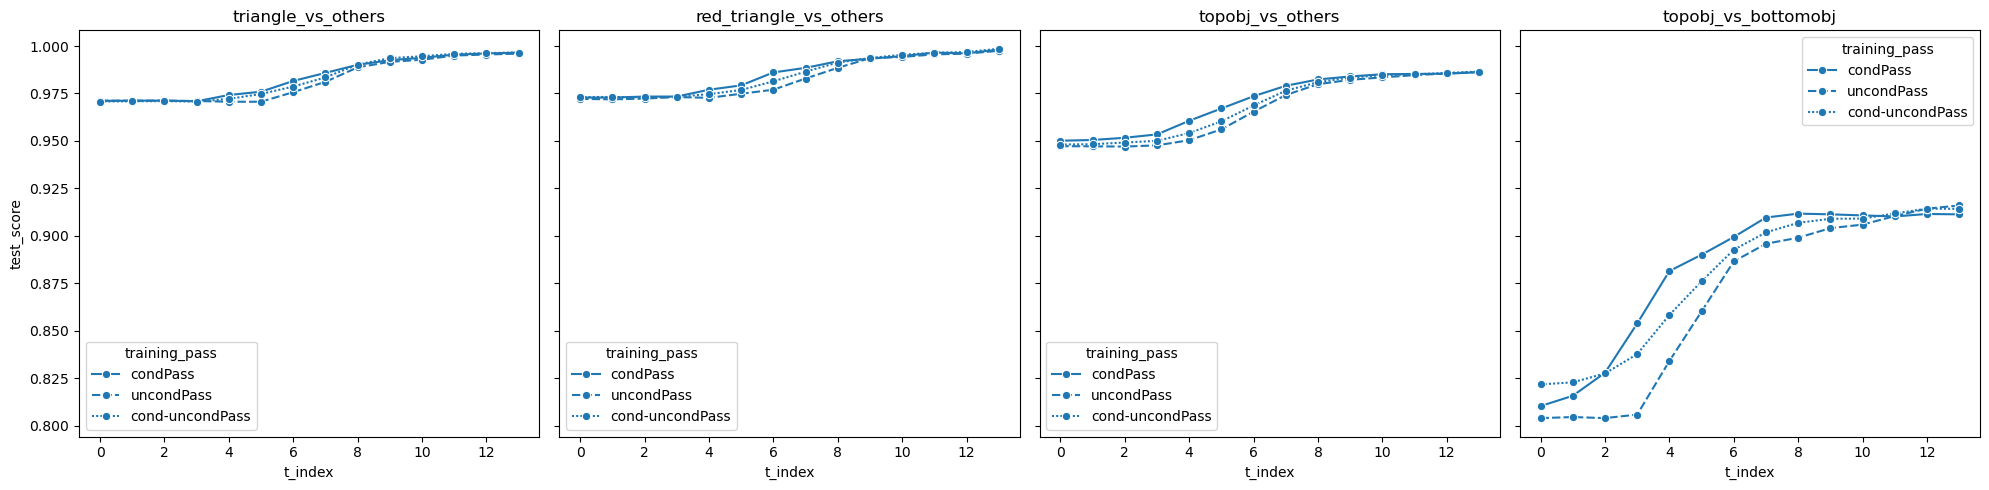

In [49]:
# sns.set_theme(style="whitegrid")
for metric in ["precision", "recall", "f1_score", "train_score", "test_score"]:
    fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharex=True, sharey=True)
    for i, label in enumerate(["triangle_vs_others", "red_triangle_vs_others", "topobj_vs_others", "topobj_vs_bottomobj"]):
        sns.lineplot(data=syn_df[syn_df.annot_label == label], 
                    x="t_index", y=metric, style="training_pass", markers="o", ax=axes[i])
        axes[i].set_title(label)
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_2156354/1213997058.py:4: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=syn_df, x="t_index", y="train_score", # .query("training_pass == 'cond-uncondPass'")


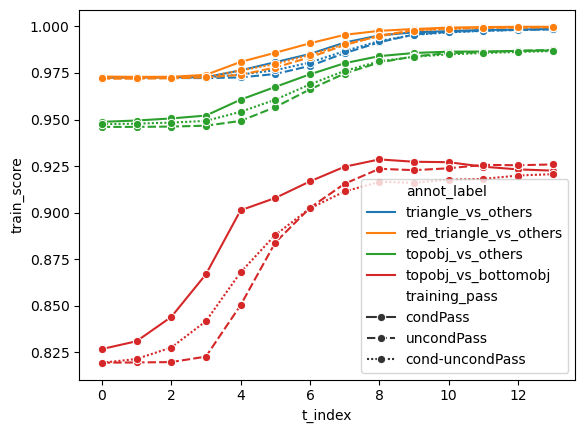

/tmp/ipykernel_2156354/1213997058.py:7: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=syn_df, x="t_index", y="test_score", # .query("training_pass == 'cond-uncondPass'")


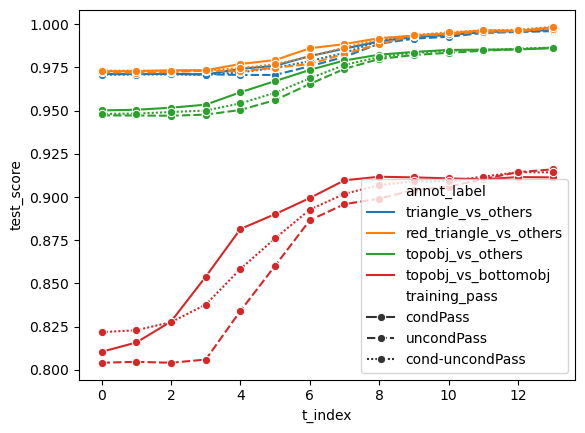

In [12]:
sns.lineplot(data=syn_df, x="t_index", y="train_score", # .query("training_pass == 'cond-uncondPass'")
                    style="training_pass", hue="annot_label", markers="o")
plt.show()
sns.lineplot(data=syn_df, x="t_index", y="test_score", # .query("training_pass == 'cond-uncondPass'")
                    style="training_pass", hue="annot_label", markers="o")
plt.show()

/tmp/ipykernel_2156354/2429721325.py:4: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=syn_df, x="t_index", y="precision", style="training_pass", hue="annot_label", markers="o") # .query("training_pass == 'cond-uncondPass'")


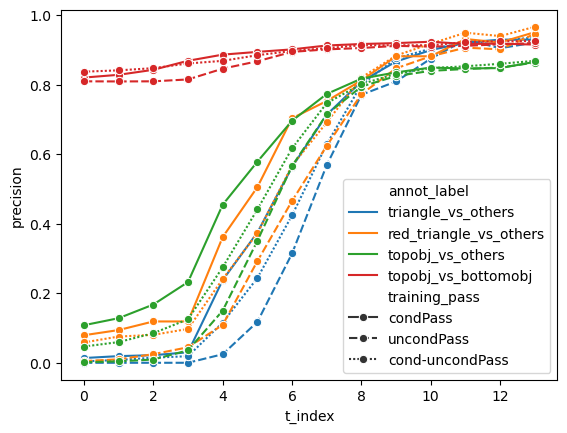

/tmp/ipykernel_2156354/2429721325.py:6: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=syn_df, x="t_index", y="recall", style="training_pass", hue="annot_label", markers="o") # .query("training_pass == 'cond-uncondPass'")


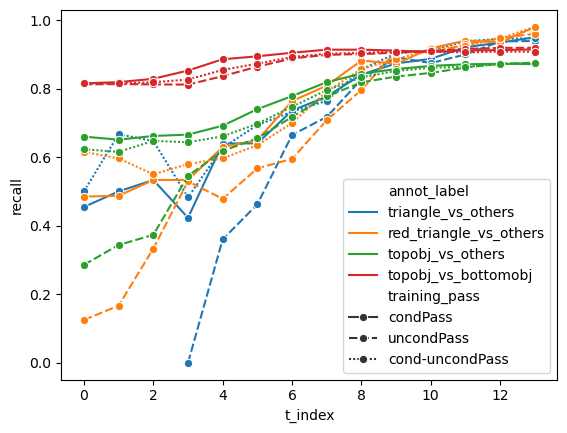

/tmp/ipykernel_2156354/2429721325.py:8: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=syn_df, x="t_index", y="f1_score", style="training_pass", hue="annot_label", markers="o") # .query("training_pass == 'cond-uncondPass'")


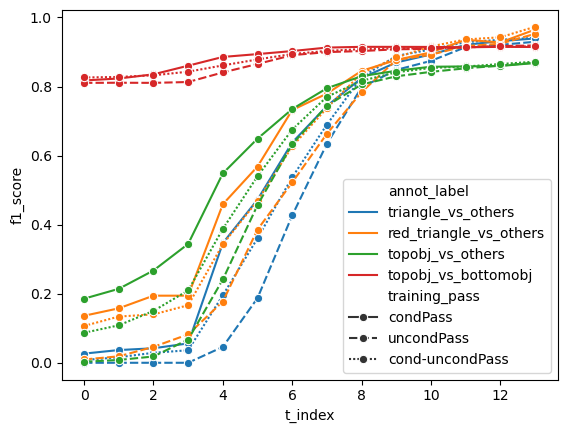

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
# sns.set_theme(style="whitegrid")
sns.lineplot(data=syn_df, x="t_index", y="precision", style="training_pass", hue="annot_label", markers="o") # .query("training_pass == 'cond-uncondPass'")
plt.show()
sns.lineplot(data=syn_df, x="t_index", y="recall", style="training_pass", hue="annot_label", markers="o") # .query("training_pass == 'cond-uncondPass'")
plt.show()
sns.lineplot(data=syn_df, x="t_index", y="f1_score", style="training_pass", hue="annot_label", markers="o") # .query("training_pass == 'cond-uncondPass'")
plt.show()

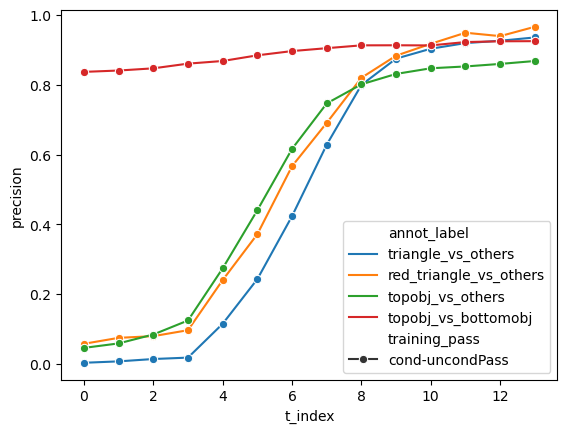

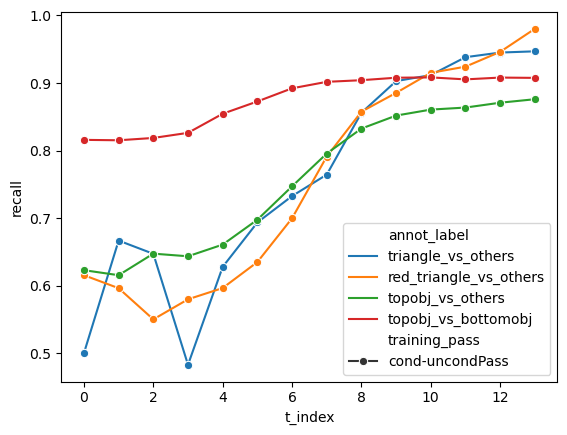

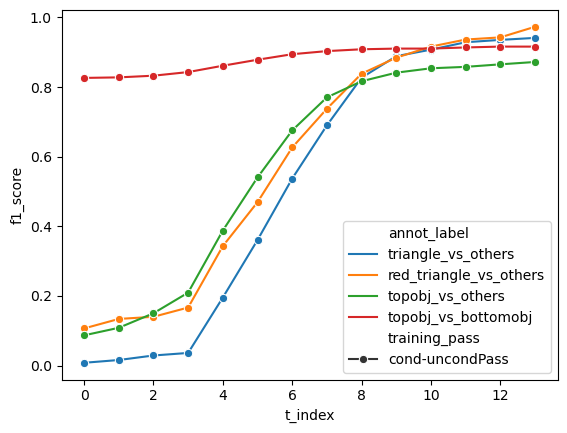

In [20]:

sns.lineplot(data=syn_df.query("training_pass == 'cond-uncondPass'"), x="t_index", y="precision", style="training_pass", hue="annot_label", markers="o")
plt.show()
sns.lineplot(data=syn_df.query("training_pass == 'cond-uncondPass'"), x="t_index", y="recall", style="training_pass", hue="annot_label", markers="o")
plt.show()
sns.lineplot(data=syn_df.query("training_pass == 'cond-uncondPass'"), x="t_index", y="f1_score", style="training_pass", hue="annot_label", markers="o")
plt.show()

### Geometry and dynamics via cosine similarity

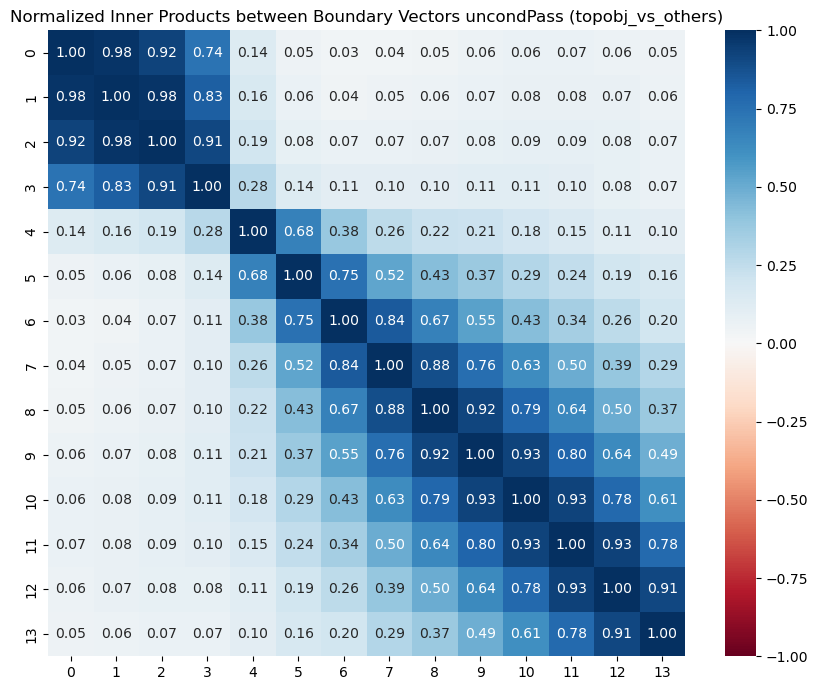

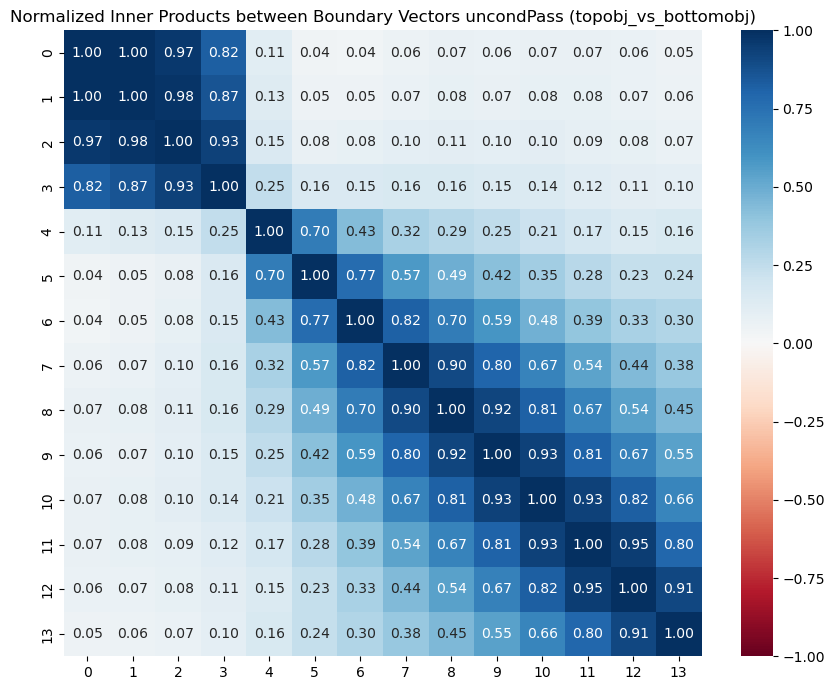

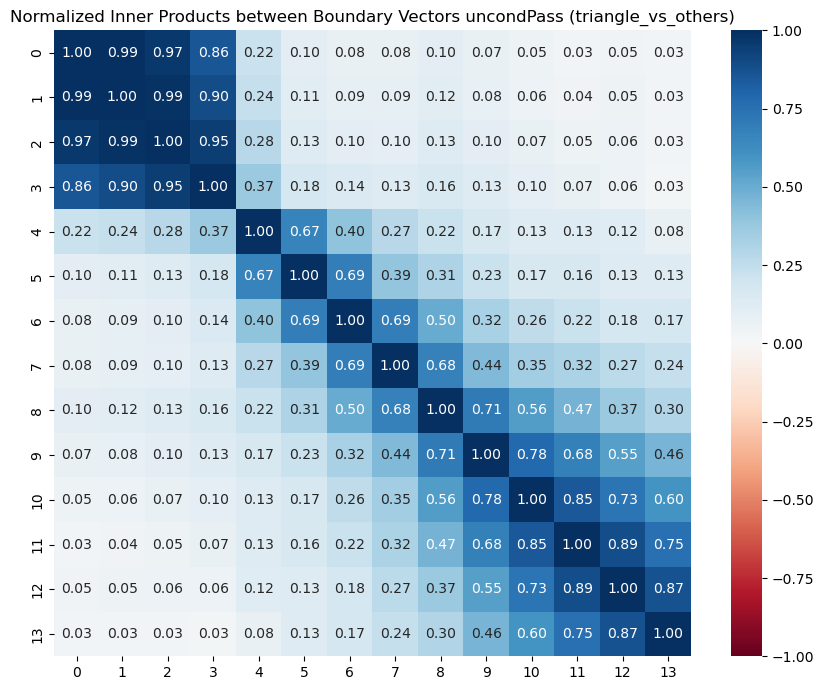

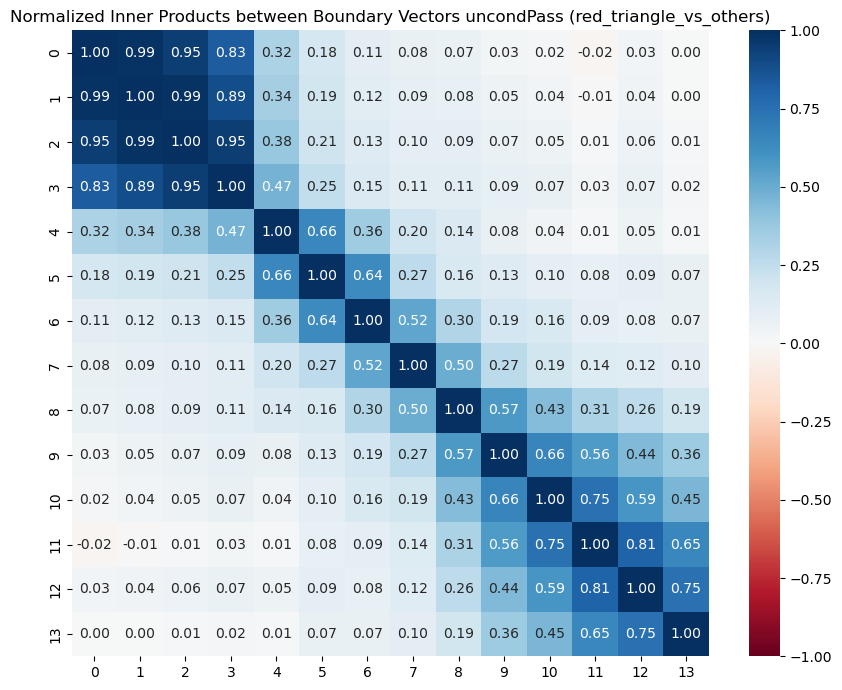

In [20]:
# Compute inner products between boundary vectors for each t_index
# Filter data for current t_index and cond-uncondPass
for annot_label in ["topobj_vs_others", "topobj_vs_bottomobj", "triangle_vs_others", "red_triangle_vs_others"]:
    df_subsel = syn_df.query("annot_label == @annot_label and training_pass == 'uncondPass'")
    df_subsel = df_subsel.sort_values(by="t_index")
    # Extract boundary vectors and labels
    vectors = np.stack(df_subsel['boundary_vector'].values)
    labels = df_subsel['t_index'].values

    # Compute normalized inner products
    norm_vectors = vectors / np.linalg.norm(vectors, axis=1)[:, None]
    inner_products = norm_vectors @ norm_vectors.T

    # Create heatmap
    plt.figure(figsize=(8.5, 7))
    sns.heatmap(inner_products, 
                xticklabels=labels, 
                yticklabels=labels,
                annot=True, 
                fmt='.2f',
                cmap='RdBu',
                vmin=-1, 
                vmax=1,
                center=0)
    plt.title(f'Normalized Inner Products between Boundary Vectors uncondPass ({annot_label})')
    plt.tight_layout()
    plt.show()


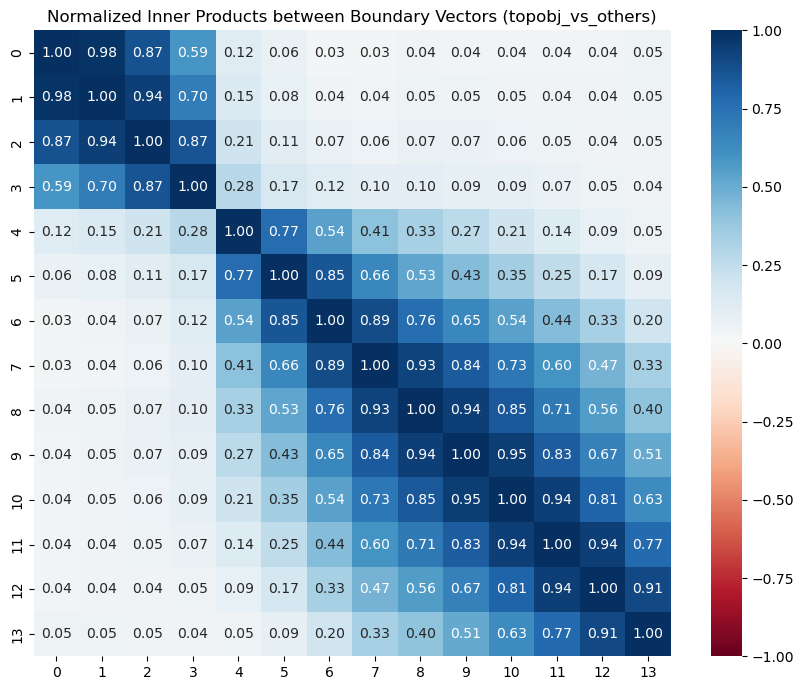

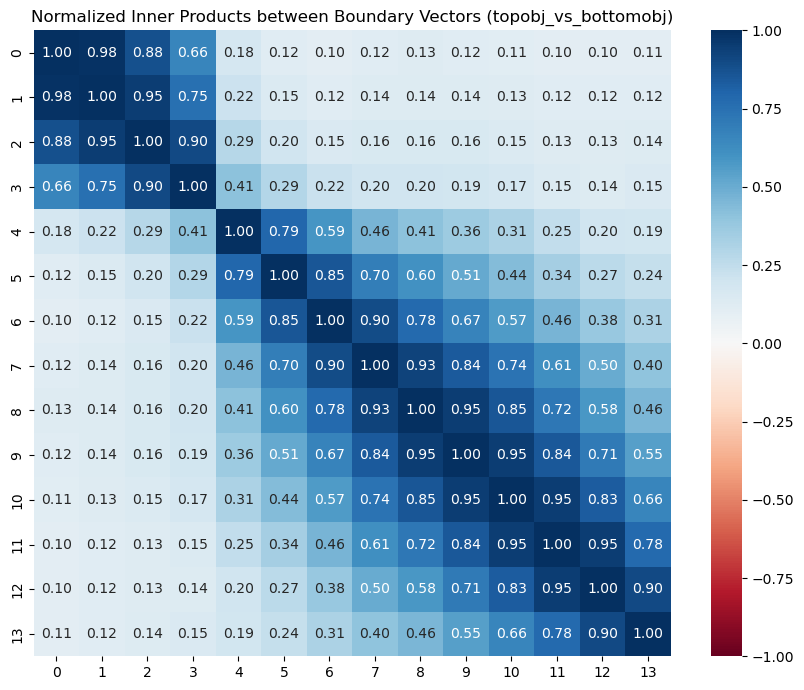

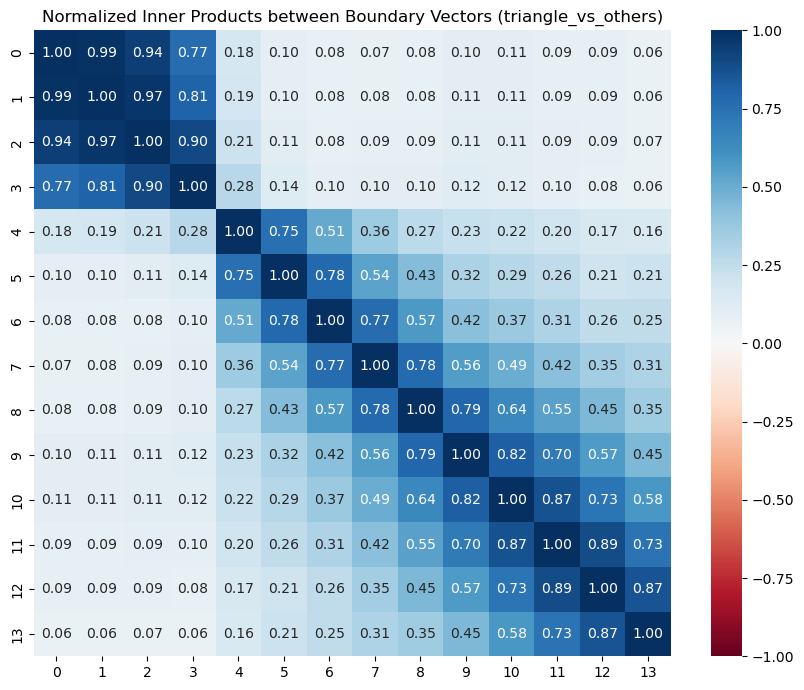

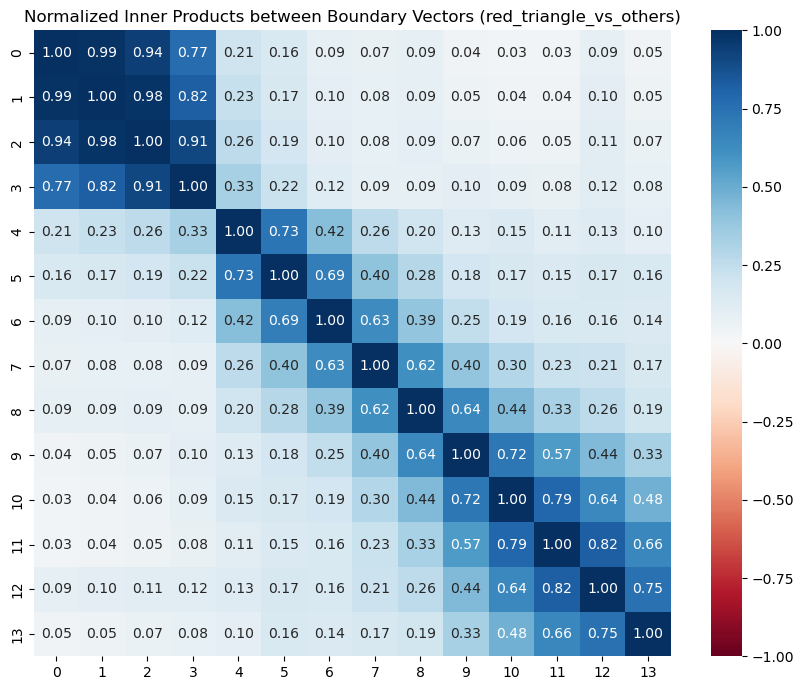

In [15]:
# Compute inner products between boundary vectors for each t_index
# Filter data for current t_index and cond-uncondPass
for annot_label in ["topobj_vs_others", "topobj_vs_bottomobj", "triangle_vs_others", "red_triangle_vs_others"]:
    df_subsel = syn_df.query("annot_label == @annot_label and training_pass == 'cond-uncondPass'")
    df_subsel = df_subsel.sort_values(by="t_index")
    # Extract boundary vectors and labels
    vectors = np.stack(df_subsel['boundary_vector'].values)
    labels = df_subsel['t_index'].values

    # Compute normalized inner products
    norm_vectors = vectors / np.linalg.norm(vectors, axis=1)[:, None]
    inner_products = norm_vectors @ norm_vectors.T

    # Create heatmap
    plt.figure(figsize=(8.5, 7))
    sns.heatmap(inner_products, 
                xticklabels=labels, 
                yticklabels=labels,
                annot=True, 
                fmt='.2f',
                cmap='RdBu',
                vmin=-1, 
                vmax=1,
                center=0)
    plt.title(f'Normalized Inner Products between Boundary Vectors cond-uncondPass ({annot_label})')
    plt.tight_layout()
    plt.show()

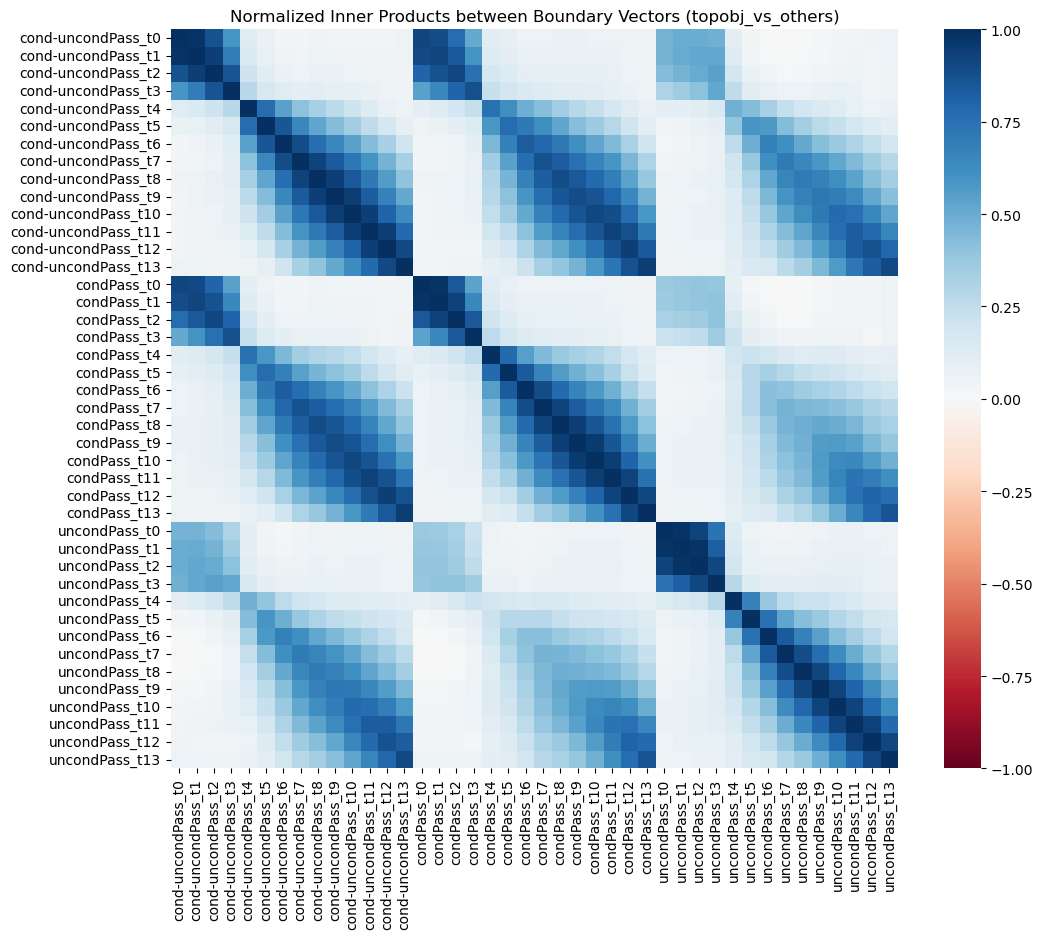

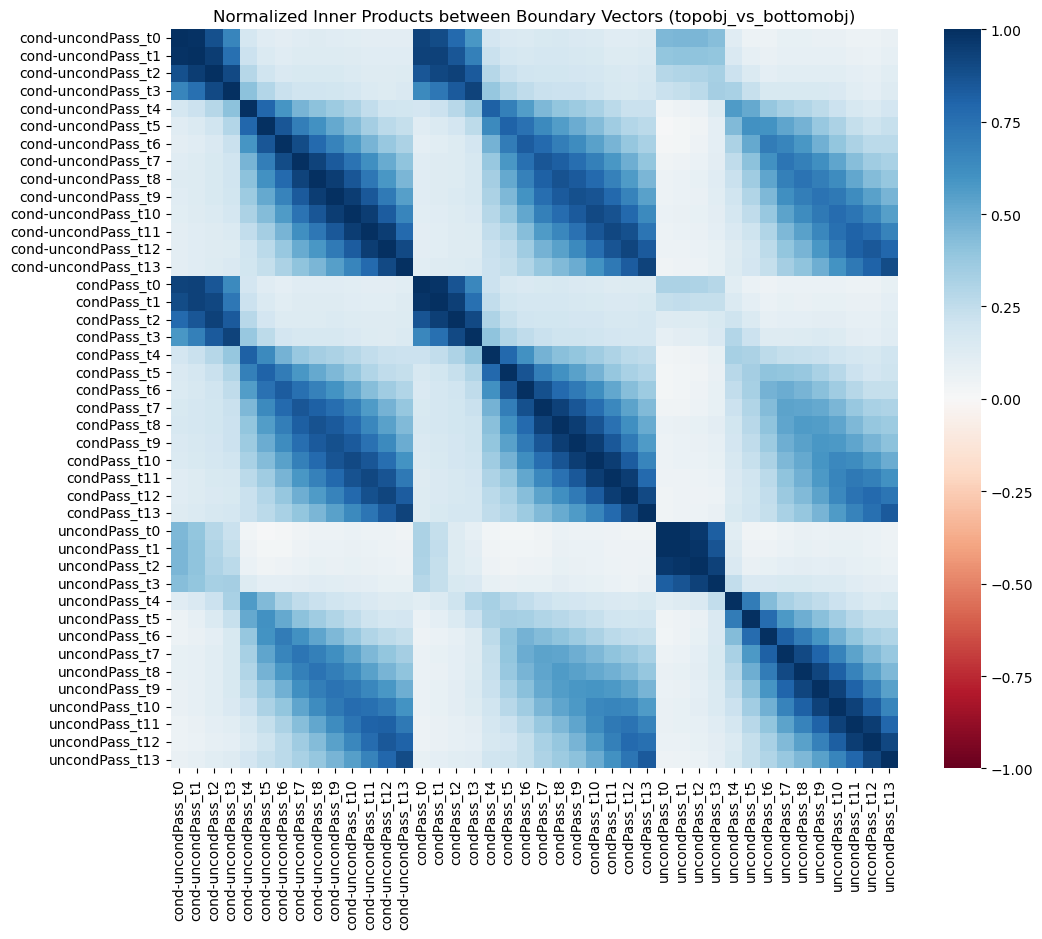

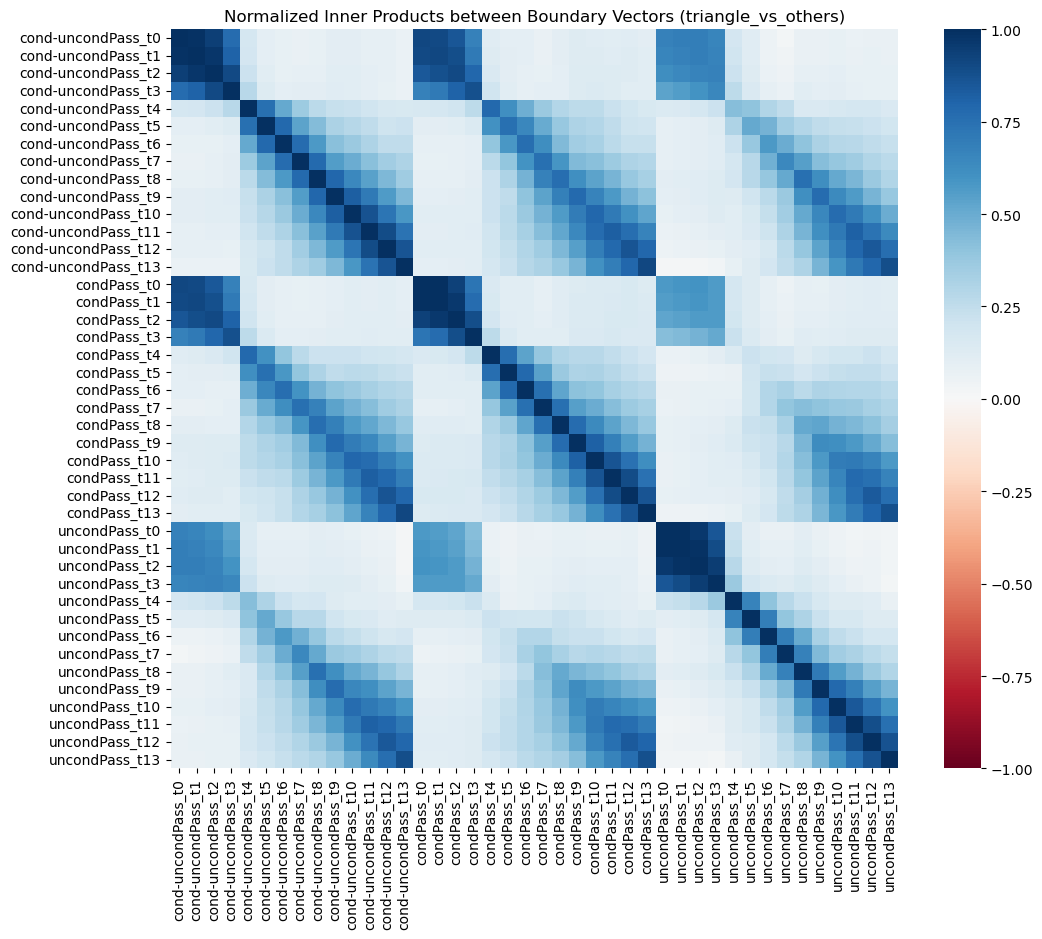

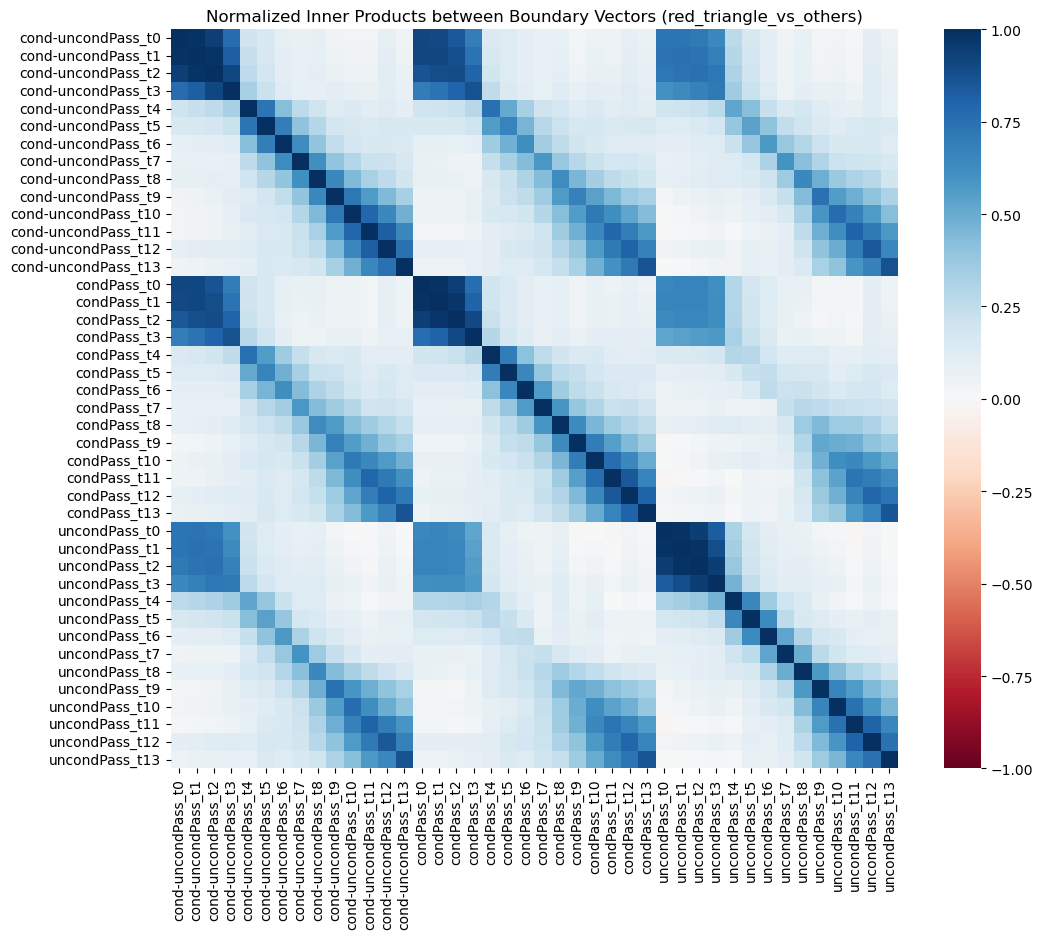

In [19]:
# Compute inner products between boundary vectors for each t_index
# ["triangle_vs_others", "red_triangle_vs_others", "topobj_vs_others", "topobj_vs_bottomobj"]
# for t_index in range(14):
# Filter data for current t_index and cond-uncondPass
for annot_label in ["topobj_vs_others", "topobj_vs_bottomobj", "triangle_vs_others", "red_triangle_vs_others"]:
    df_subsel = syn_df.query("annot_label == @annot_label")
    df_subsel = df_subsel.sort_values(by=["training_pass", "t_index"])
    # Extract boundary vectors and labels
    vectors = np.stack(df_subsel['boundary_vector'].values)
    labels = df_subsel['training_pass'].values + "_t" + df_subsel['t_index'].values.astype(str)
    
    # Compute normalized inner products
    norm_vectors = vectors / np.linalg.norm(vectors, axis=1)[:, None]
    inner_products = norm_vectors @ norm_vectors.T
    
    # Create heatmap
    plt.figure(figsize=(11, 9.5))
    sns.heatmap(inner_products, 
                xticklabels=labels, 
                yticklabels=labels,
                # annot=True, 
                # fmt='.2f',
                cmap='RdBu',
                vmin=-1, 
                vmax=1,
                center=0)
    plt.title(f'Normalized Inner Products between Boundary Vectors ({annot_label})')
    plt.tight_layout()
    plt.show()

### Geometry of classify boundary vectors via PCA, tSNE, UMAP

In [45]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP

# plot the PCA / t-SNE / UMAP of the boundary vectors and then color by the training pass
boundary_vectors_all = np.stack(syn_df['boundary_vector'].values)
pca = PCA(n_components=5)
dimred_embeds = pca.fit_transform(boundary_vectors_all)
print(pca.explained_variance_ratio_)

[0.17513505 0.10622894 0.07672824 0.06006411 0.04887082]


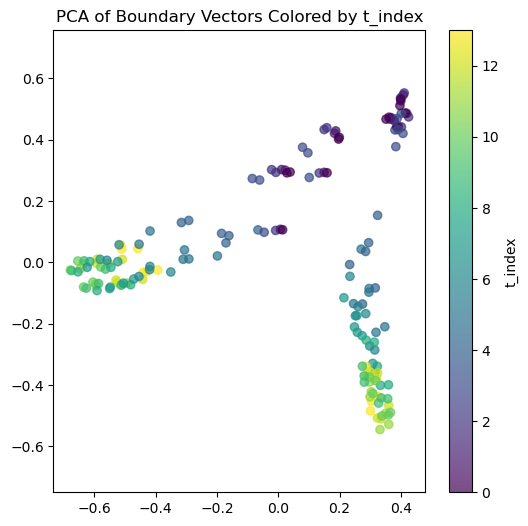

/tmp/ipykernel_2156354/2722878762.py:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.legend(handles=[plt.scatter([], [], c=color_map[label], label=label) for label in unique_labels])


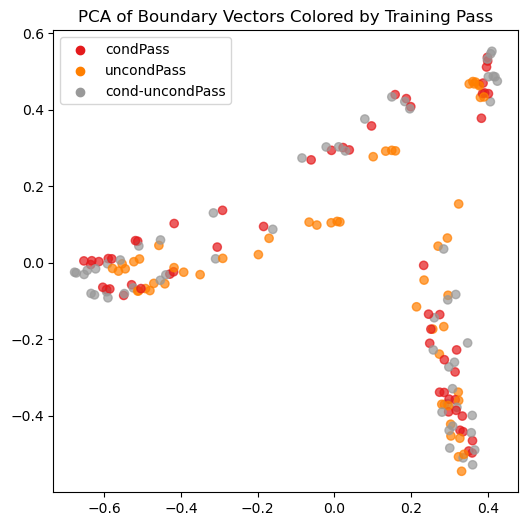

/tmp/ipykernel_2156354/2722878762.py:28: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.legend(handles=[plt.scatter([], [], c=color_map[label], label=label) for label in unique_labels])


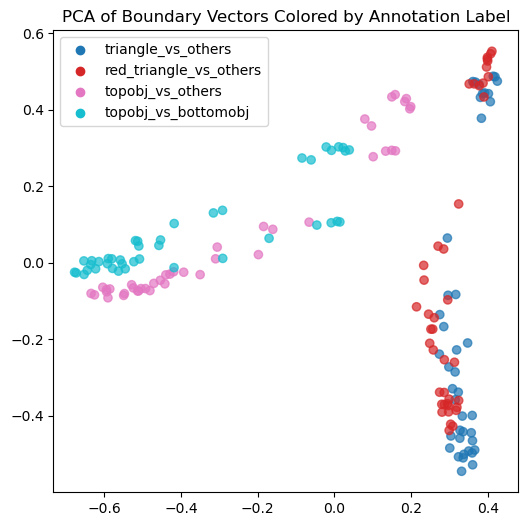

In [41]:
def plot_pca_results(dimred_embeds, df):
    # Plot by t_index
    plt.figure(figsize=(6, 6))
    plt.scatter(dimred_embeds[:, 0], dimred_embeds[:, 1], c=df['t_index'].values, alpha=0.7, cmap='viridis')
    plt.axis('equal')
    plt.colorbar(label='t_index')
    plt.title('PCA of Boundary Vectors Colored by t_index')
    plt.show()

    # Plot by training pass
    unique_labels = df['training_pass'].unique()
    color_map = dict(zip(unique_labels, plt.cm.Set1(np.linspace(0, 1, len(unique_labels)))))
    colors = [color_map[label] for label in df['training_pass'].values]
    plt.figure(figsize=(6, 6))
    plt.scatter(dimred_embeds[:, 0], dimred_embeds[:, 1], c=colors, alpha=0.7)
    plt.axis('equal')
    plt.legend(handles=[plt.scatter([], [], c=color_map[label], label=label) for label in unique_labels])
    plt.title('PCA of Boundary Vectors Colored by Training Pass')
    plt.show()

    # Plot by annotation label
    unique_labels = df['annot_label'].unique()
    color_map = dict(zip(unique_labels, plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))))
    colors = [color_map[label] for label in df['annot_label'].values]
    plt.figure(figsize=(6, 6))
    plt.scatter(dimred_embeds[:, 0], dimred_embeds[:, 1], c=colors, alpha=0.7)
    plt.axis('equal')
    plt.legend(handles=[plt.scatter([], [], c=color_map[label], label=label) for label in unique_labels])
    plt.title('PCA of Boundary Vectors Colored by Annotation Label')
    plt.show()

plot_pca_results(dimred_embeds, syn_df)

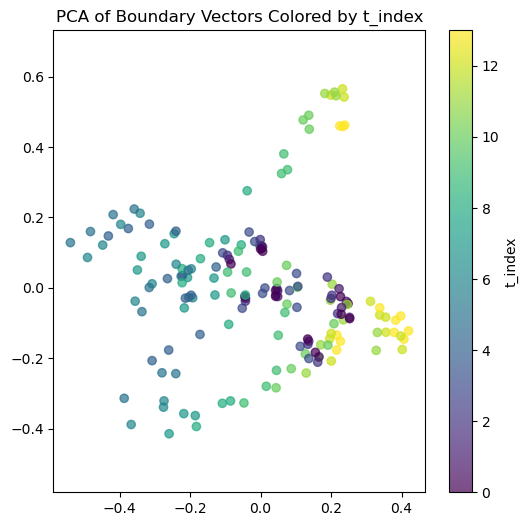

/tmp/ipykernel_2156354/2722878762.py:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.legend(handles=[plt.scatter([], [], c=color_map[label], label=label) for label in unique_labels])


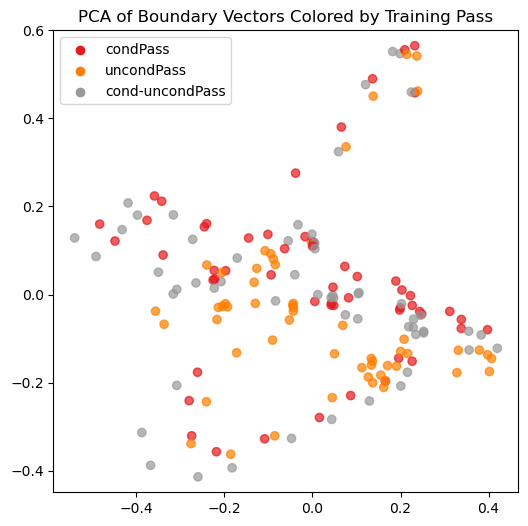

/tmp/ipykernel_2156354/2722878762.py:28: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.legend(handles=[plt.scatter([], [], c=color_map[label], label=label) for label in unique_labels])


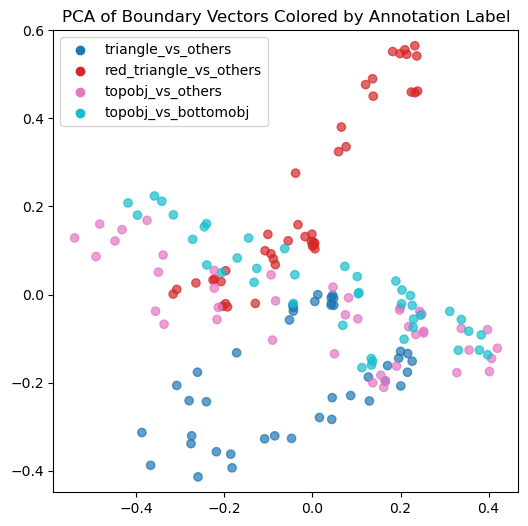

In [44]:
plot_pca_results(dimred_embeds[:, 3:5], syn_df)


### Dev zone

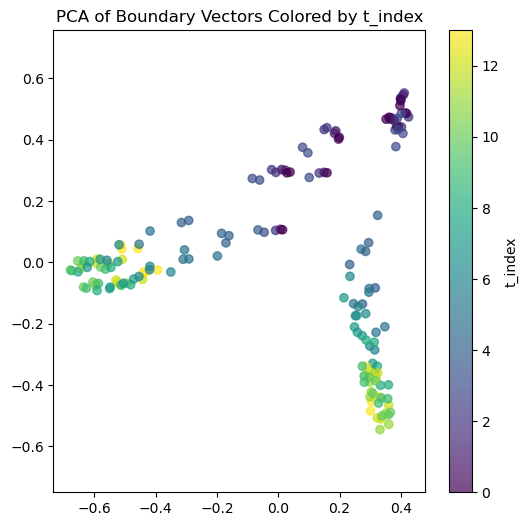

/tmp/ipykernel_2156354/3959842361.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.legend(handles=[plt.scatter([], [], c=color_map[label], label=label) for label in unique_labels])


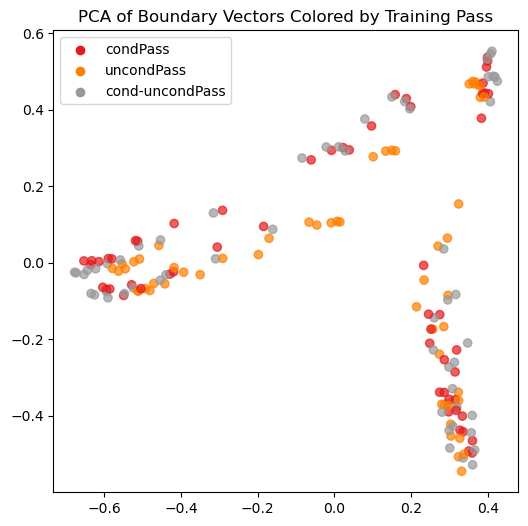

/tmp/ipykernel_2156354/3959842361.py:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.legend(handles=[plt.scatter([], [], c=color_map[label], label=label) for label in unique_labels])


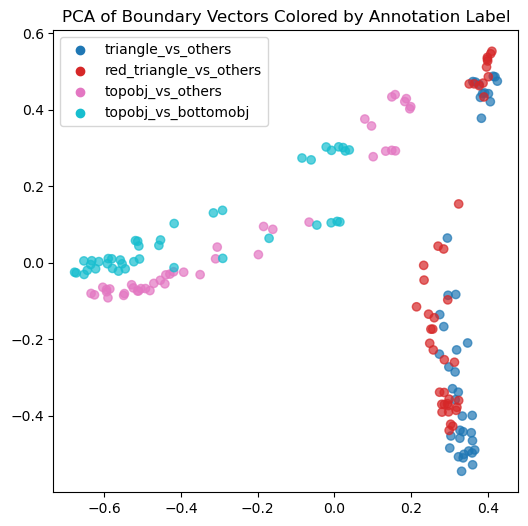

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(dimred_embeds[:, 0], dimred_embeds[:, 1], c=syn_df['t_index'].values, alpha=0.7, cmap='viridis')
plt.axis('equal')
plt.colorbar(label='t_index')
plt.title('PCA of Boundary Vectors Colored by t_index')
plt.show()

unique_labels = syn_df['training_pass'].unique()
color_map = dict(zip(unique_labels, plt.cm.Set1(np.linspace(0, 1, len(unique_labels)))))
colors = [color_map[label] for label in syn_df['training_pass'].values]
plt.figure(figsize=(6, 6))
plt.scatter(dimred_embeds[:, 0], dimred_embeds[:, 1], c=colors, alpha=0.7)
plt.axis('equal')
plt.legend(handles=[plt.scatter([], [], c=color_map[label], label=label) for label in unique_labels])
plt.title('PCA of Boundary Vectors Colored by Training Pass')
plt.show()

# Create categorical color mapping for discrete labels
unique_labels = syn_df['annot_label'].unique()
color_map = dict(zip(unique_labels, plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))))
colors = [color_map[label] for label in syn_df['annot_label'].values]

plt.figure(figsize=(6, 6))
scatter = plt.scatter(dimred_embeds[:, 0], dimred_embeds[:, 1], c=colors, alpha=0.7)
plt.axis('equal')
plt.legend(handles=[plt.scatter([], [], c=color_map[label], label=label) for label in unique_labels])
plt.title('PCA of Boundary Vectors Colored by Annotation Label')
plt.show()